In [1]:
import os
import json
import glob
import re

directories = [
    "data/scraped/cpp_in__co_ali_go__in_vs",
    "data/scraped/kzp_in_ko"
]

def split_into_sentences(text):
    delimiters = r"[.?!,;\n]+"  # Splitting on ., ?, !, ,, ;, and new lines
    sentences = [s.strip() for s in re.split(delimiters, text) if s.strip()]
    return set(sentences)


match_ratios = []
lenghts_dict = {}
for directory in directories:
    json_files = glob.glob(os.path.join(directory, "*.json"))
    directory_lengths = []
    
    for file in json_files:
        with open(file, "r", encoding="utf-8") as f:
            try:
                data = json.load(f)
                
                izrek = data.get("content", {}).get("izrek", "")
                obrazlozitev = data.get("content", {}).get("obrazložitev", "")
                jedro = data.get("content", {}).get("jedro", "")

                directory_lengths.append(len(jedro))
            except json.JSONDecodeError:
                print(f"Error reading JSON file: {file}")
                
    lenghts_dict[directory] = directory_lengths
                

Directory: data/scraped/cpp_in__co_ali_go__in_vs
  Avg length: 395.75
  Std Dev: 359.84
  Count: 16312
----------------------------------------
Directory: data/scraped/kzp_in_ko
  Avg length: 556.36
  Std Dev: 668.18
  Count: 3020
----------------------------------------


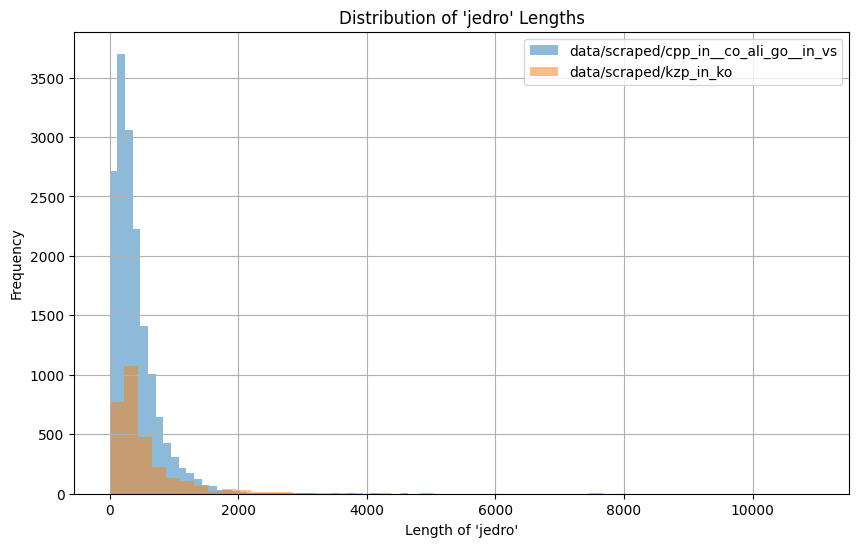

In [2]:
import numpy as np
import matplotlib.pyplot as plt

stats = {}
for directory, lengths in lenghts_dict.items():
    if lengths:
        avg_length = np.mean(lengths)
        std_dev = np.std(lengths)
        stats[directory] = {"avg": avg_length, "std_dev": std_dev, "count": len(lengths)}
    else:
        stats[directory] = {"avg": None, "std_dev": None, "count": 0}

for directory, values in stats.items():
    print(f"Directory: {directory}")
    print(f"  Avg length: {values['avg']:.2f}" if values['avg'] is not None else "  No data")
    print(f"  Std Dev: {values['std_dev']:.2f}" if values['std_dev'] is not None else "  No data")
    print(f"  Count: {values['count']}")
    print("-" * 40)

plt.figure(figsize=(10, 6))
for directory, lengths in lenghts_dict.items():
    if lengths:
        plt.hist(lengths, bins=50, alpha=0.5, label=directory)

plt.xlabel("Length of 'jedro'")
plt.ylabel("Frequency")
plt.title("Distribution of 'jedro' Lengths")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
with open('results_2step_core_verbatim.json', 'r') as f:
    gpt_results = json.load(f) 

In [7]:
gpt_result_lengths = [len(result['gpt_result']['gpt_jedro']) for result in gpt_results['results']]

  Avg length: 458.60
  Std Dev: 124.04
  Count: 3020
----------------------------------------


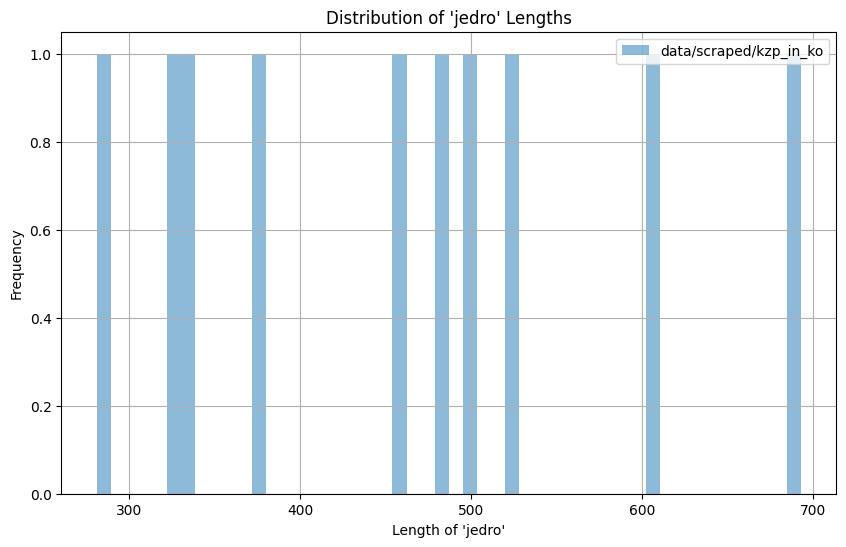

In [9]:
import numpy as np
import matplotlib.pyplot as plt

avg_length = np.mean(gpt_result_lengths)
std_dev = np.std(gpt_result_lengths)
stats = {"avg": avg_length, "std_dev": std_dev, "count": len(lengths)}


print(f"  Avg length: {stats['avg']:.2f}" if stats['avg'] is not None else "  No data")
print(f"  Std Dev: {stats['std_dev']:.2f}" if stats['std_dev'] is not None else "  No data")
print(f"  Count: {stats['count']}")
print("-" * 40)

plt.figure(figsize=(10, 6))

plt.hist(gpt_result_lengths, bins=50, alpha=0.5, label=directory)

plt.xlabel("Length of 'jedro'")
plt.ylabel("Frequency")
plt.title("Distribution of 'jedro' Lengths")
plt.legend()
plt.grid(True)
plt.show()
